In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Accessing

In [160]:
# import the dataset into dataframe
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [161]:
# Find the length of the train and test dataset
train_len = len(train)
test_len = len(test)

In [162]:
train_len

891

In [163]:
# join the train and test dataset for processing and cleaning
df=pd.concat([train, test], ignore_index=True)

In [164]:
# Check the top five rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
# Check the last five rows of the dataframe
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [166]:
# Check the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [167]:
# Check the statistical summary
df. describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [168]:
# Check for missing values
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [169]:
# NB: we didnt have a missing value in the survived because survived is the target

In [170]:
# Check for duplicate record
df.duplicated().sum()

0

# Data cleaning

In [171]:
# Fill the missing values in Age with mean
age_mean = round(df["Age"].mean(), 0)
df.Age.fillna(age_mean, inplace = True)

In [172]:
# Fill the missing values in Fare with mode
fare_mean = round(df['Fare'].mean(), 0)
df.Fare.fillna(fare_mean, inplace = True)

In [173]:
# Fill the missing values in Embarked with mode
embarked_mode = df['Embarked'].mode()[0]
df.Embarked.fillna(embarked_mode, inplace=True)

In [174]:
# Drop the cabin column because missing values are more than 70%
df.drop(columns=['Cabin'], inplace=True)

In [175]:
# Function to split the title from the name
title_split = lambda x: x.split()[1].strip(".")

In [176]:
# new column
df['Title'] = df['Name'].apply(title_split)

In [177]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,y
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr


In [178]:
df['Title'].value_counts()

Mr              736
Miss            256
Mrs             191
Master           59
Dr                8
Rev               8
y                 8
Planke,           4
Col               4
Impe,             3
Billiard,         3
Mlle              2
Carlo,            2
Ms                2
Major             2
Gordon,           2
Messemaeker,      2
Velde,            1
Palmquist,        1
Khalil,           1
Cruyssen,         1
Melkebeke,        1
Jonkheer          1
Shawah,           1
the               1
Walle,            1
Capt              1
Don               1
Pelsmaeker,       1
Mme               1
Steen,            1
der               1
Mulder,           1
Brito,            1
Name: Title, dtype: int64

In [179]:
title_list=['Mr', 'Miss', 'Mrs', 'Master','Dr', 'Rev']


In [180]:
for title in df["Title"]:
    if title not in title_list:
        df["Title"].replace(title, "Mr", inplace=True)

# Exploration Data Analysis (EDA)
1. Unit variate Analysis: comparing column with itself
2. Bi-variate analysis: comparing two columns from a dataframe
3. multi-variates analysis: comparing more than two columns in a dataframe

In [181]:
# For count of the pclass
class_count=df.Pclass.value_counts()
class_count.index = ['third class', 'first class', 'second class']
class_count

third class     709
first class     323
second class    277
Name: Pclass, dtype: int64

# Uni variate
For the text : make a count
For  the number column : show the distribution  

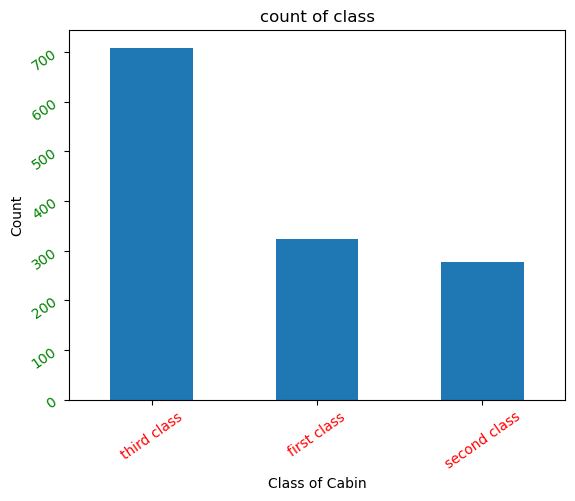

In [182]:
# Using pandas plot for the analysis above
class_count.plot(kind="bar")
plt.title('count of class')
plt.xlabel('Class of Cabin')
plt.ylabel('Count')
plt.xticks(rotation=35, color='red')
plt.yticks(rotation=35, color='green')
plt.show()

In [183]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr


In [184]:
sex_count=df.Sex.value_counts()
sex_count


male      843
female    466
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

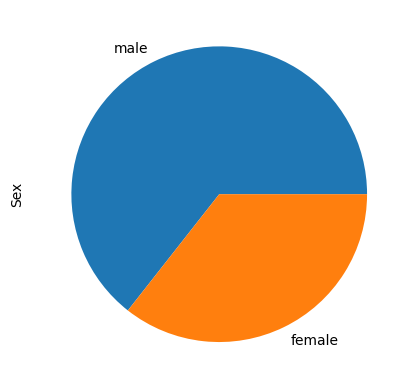

In [185]:
sex_count.plot(kind='pie')

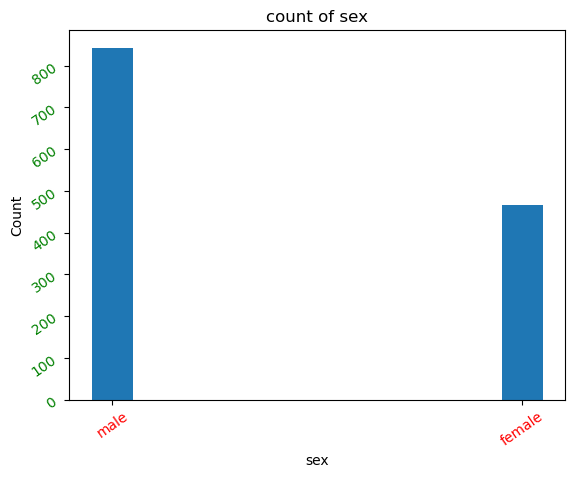

In [186]:
# Matplot illustration
sex_count=df.Sex.value_counts()
plt.bar(x=sex_count.index, height=sex_count.values, width=0.1)

plt.title('count of sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=35, color='red')
plt.yticks(rotation=35, color='green')
plt.show()

<AxesSubplot:>

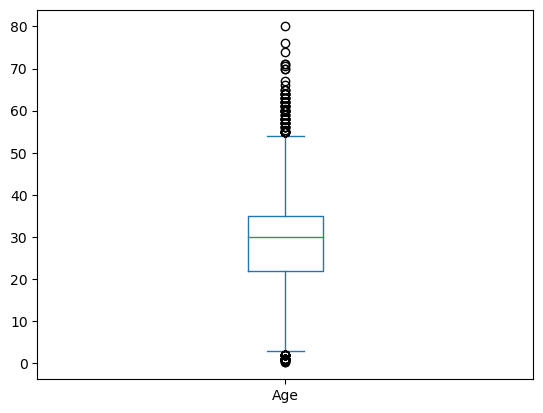

In [187]:
df['Age'].plot(kind='box')

In [188]:
# outliers refers to numbers that are extremely too low when compared others

<AxesSubplot:ylabel='Frequency'>

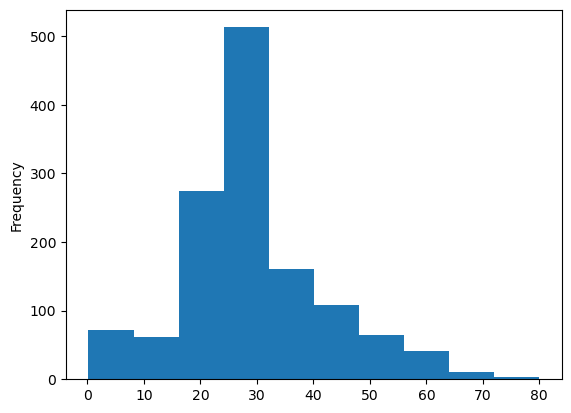

In [189]:
df['Age'].plot(kind='hist')

# Bi Variate
category vs category

In [190]:
# Bi- variate analysis
dead=df.query("Survived==0")["Pclass"].value_counts()
alive=df.query("Survived==1")["Pclass"].value_counts()

In [191]:
i=pd.concat([dead,alive], axis=1, keys=["dead","alive"])

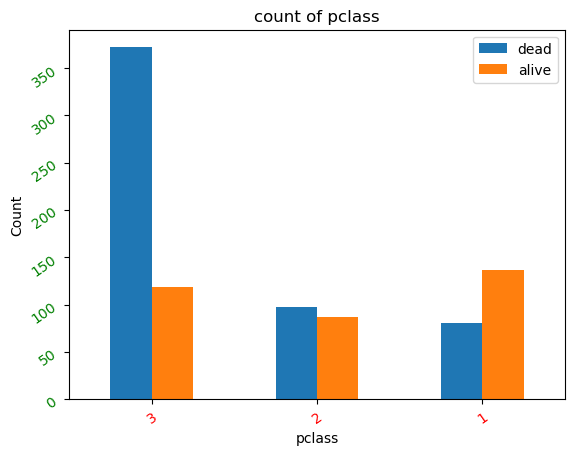

In [192]:
i.plot(kind="bar")

plt.title('count of pclass')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.xticks(rotation=35, color='red')
plt.yticks(rotation=35, color='green')
plt.show()

# Create a function

In [193]:
def barplot(col):
    dead=df.query("Survived==0")[col].value_counts()
    alive=df.query("Survived==1")[col].value_counts()
    i=pd.concat([dead,alive], axis=1, keys=["dead","alive"])
    i.plot(kind="bar")
    plt.title(f'count of {col}')
    plt.xlabel(f' {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=35, color='red')
    plt.yticks(rotation=35, color='green')
    plt.show()

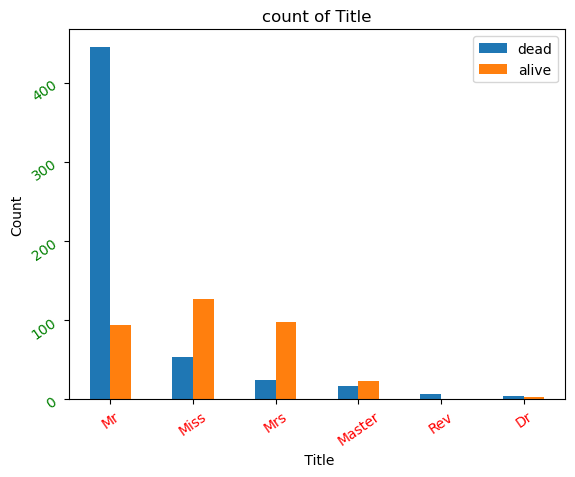

In [194]:
barplot("Title")

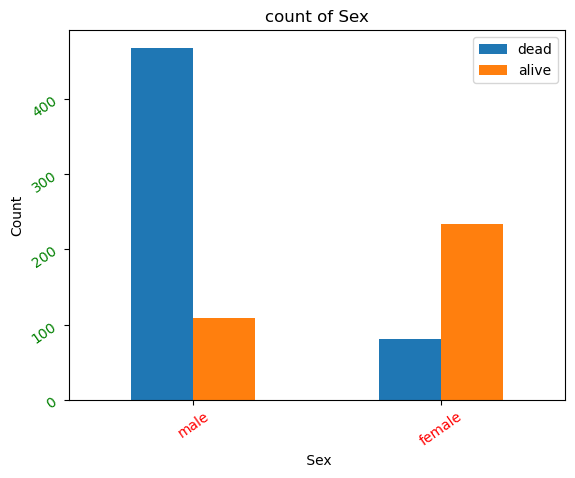

In [195]:
barplot("Sex")

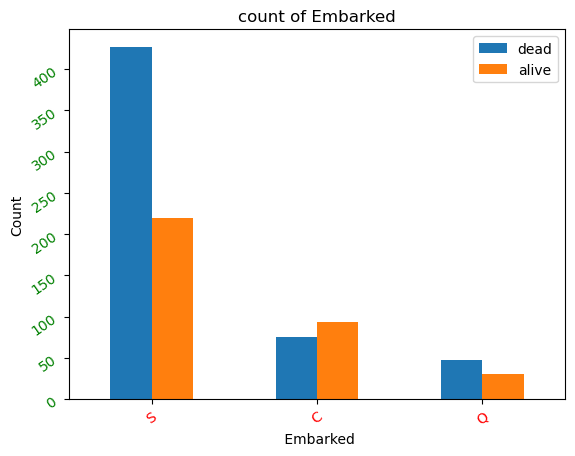

In [196]:
barplot("Embarked")

In [197]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr


# Cat vs numerical
a. add aspect=4 to make the chat wider
b. shade= True i.e for the area line to be shaded
c. xlim()= use to add length limit


(1.0, 80.0)

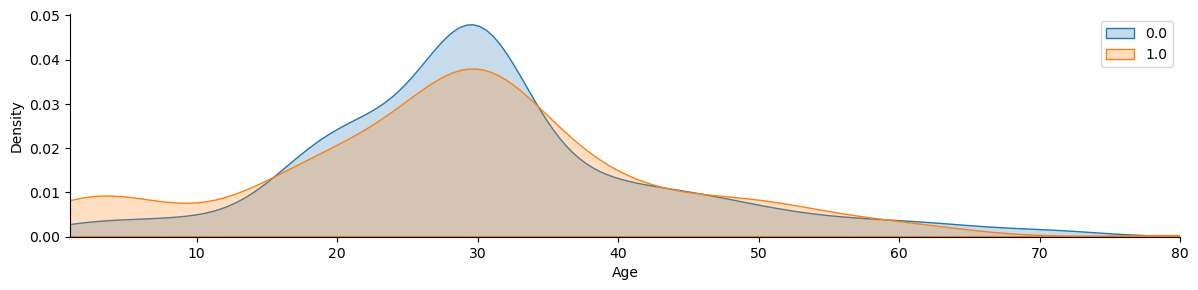

In [198]:
facet = sns.FacetGrid(data=df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age", shade=True)
plt.legend()
plt.xlim(1,80)

In [199]:
# To create another column

In [200]:
df.loc[df["Survived"]==0.0, "Survived_name"] ='dead'
df.loc[df["Survived"]==1.0, "Survived_name"] ='alive'

In [201]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Survived_name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,dead
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,alive
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,alive
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,alive
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mr,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr,NaN


In [202]:
def cat_num(cat,num):    
    facet = sns.FacetGrid(data=df, hue=cat, aspect=4)
    facet.map(sns.kdeplot, num, shade=True)
    plt.legend()
    plt.xlim(1,80)

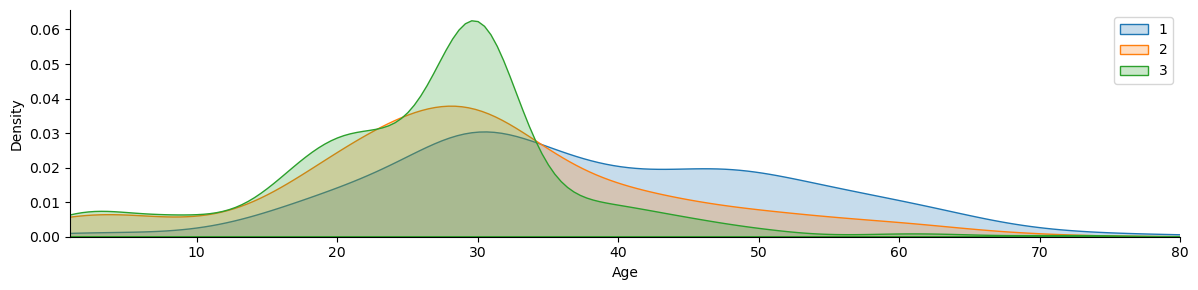

In [203]:
cat_num("Pclass", "Age")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

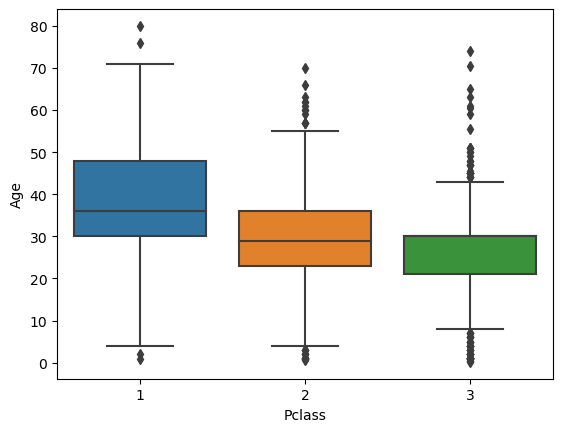

In [204]:
sns.boxplot(data=df, x="Pclass", y="Age")

# num vs num: comparing numeric vs numeric, we intend to identify the relationship existing between the variables whether positive or negative

<AxesSubplot:xlabel='Age', ylabel='Fare'>

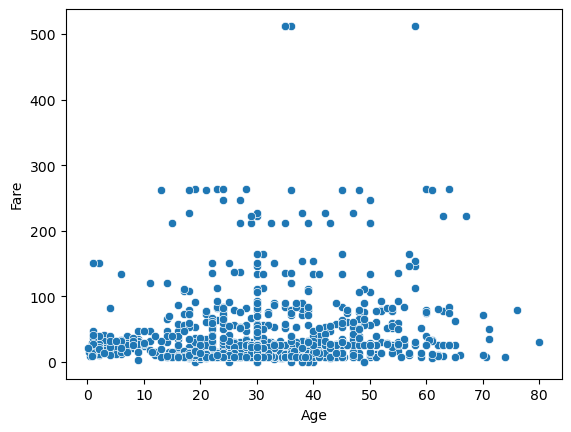

In [205]:
sns.scatterplot(data=df, x="Age", y="Fare")

In [206]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Survived_name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,dead
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,alive
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,alive
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,alive
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mr,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr,NaN


# Features Engineering

In [207]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Survived_name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,dead
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,alive
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,alive
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,alive
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,S,Mr,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,Mr,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,S,Mr,NaN


In [208]:
# to join SibSp and Parch columns
df['SibSp']

0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: SibSp, Length: 1309, dtype: int64

In [209]:
df['Parch']

0       0
1       0
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, Length: 1309, dtype: int64

In [210]:
df['SibSp'] + df['Parch']

0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Length: 1309, dtype: int64

In [211]:
df['no of family']=df['SibSp'] + df['Parch']

In [212]:
df_new = df.drop(columns=['SibSp','Parch', 'Name', 'Ticket', 'Survived_name'])

In [241]:
df_new

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,no of family
0,1,0.0,3,male,22.0,7.2500,S,Mr,1
1,2,1.0,1,female,38.0,71.2833,C,Mrs,1
2,3,1.0,3,female,26.0,7.9250,S,Miss,0
3,4,1.0,1,female,35.0,53.1000,S,Mrs,1
4,5,0.0,3,male,35.0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,30.0,8.0500,S,Mr,0
1305,1306,NaN,1,female,39.0,108.9000,C,Mr,0
1306,1307,NaN,3,male,38.5,7.2500,S,Mr,0
1307,1308,NaN,3,male,30.0,8.0500,S,Mr,0


In [214]:
 # Transformation
df_new2=pd.get_dummies(df_new, columns=['Embarked', 'Title', 'Sex'])

In [215]:
df_new2

,PassengerId,Survived,Pclass,Age,Fare,no of family,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Sex_female,Sex_male
0,1,0.0,3,22.0,7.2500,1,0,0,1,0,0,0,1,0,0,0,1
1,2,1.0,1,38.0,71.2833,1,1,0,0,0,0,0,0,1,0,1,0
2,3,1.0,3,26.0,7.9250,0,0,0,1,0,0,1,0,0,0,1,0
3,4,1.0,1,35.0,53.1000,1,0,0,1,0,0,0,0,1,0,1,0
4,5,0.0,3,35.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,30.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1
1305,1306,NaN,1,39.0,108.9000,0,1,0,0,0,0,0,1,0,0,1,0
1306,1307,NaN,3,38.5,7.2500,0,0,0,1,0,0,0,1,0,0,0,1
1307,1308,NaN,3,30.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1


In [216]:
# Separate the train from the test
train_len

891

In [217]:
# To get the train, start from beginning all the way to where train ends
df_new2[:train_len]

,PassengerId,Survived,Pclass,Age,Fare,no of family,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Sex_female,Sex_male
0,1,0.0,3,22.0,7.2500,1,0,0,1,0,0,0,1,0,0,0,1
1,2,1.0,1,38.0,71.2833,1,1,0,0,0,0,0,0,1,0,1,0
2,3,1.0,3,26.0,7.9250,0,0,0,1,0,0,1,0,0,0,1,0
3,4,1.0,1,35.0,53.1000,1,0,0,1,0,0,0,0,1,0,1,0
4,5,0.0,3,35.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,13.0000,0,0,0,1,0,0,0,0,0,1,0,1
887,888,1.0,1,19.0,30.0000,0,0,0,1,0,0,1,0,0,0,1,0
888,889,0.0,3,30.0,23.4500,3,0,0,1,0,0,1,0,0,0,1,0
889,890,1.0,1,26.0,30.0000,0,1,0,0,0,0,0,1,0,0,0,1


In [218]:
# To get the test, start from where the train ends all the way to the end
df_new2[train_len:]

,PassengerId,Survived,Pclass,Age,Fare,no of family,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Sex_female,Sex_male
891,892,NaN,3,34.5,7.8292,0,0,1,0,0,0,0,1,0,0,0,1
892,893,NaN,3,47.0,7.0000,1,0,0,1,0,0,0,0,1,0,1,0
893,894,NaN,2,62.0,9.6875,0,0,1,0,0,0,0,1,0,0,0,1
894,895,NaN,3,27.0,8.6625,0,0,0,1,0,0,0,1,0,0,0,1
895,896,NaN,3,22.0,12.2875,2,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,30.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1
1305,1306,NaN,1,39.0,108.9000,0,1,0,0,0,0,0,1,0,0,1,0
1306,1307,NaN,3,38.5,7.2500,0,0,0,1,0,0,0,1,0,0,0,1
1307,1308,NaN,3,30.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1


In [238]:
# To rename train and test
train_2=df_new2[:train_len]

In [239]:
# for test
test_2=df_new2[train_len:].drop(columns=['Survived'])

In [240]:
train_2

,PassengerId,Survived,Pclass,Age,Fare,no of family,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Sex_female,Sex_male
0,1,0.0,3,22.0,7.2500,1,0,0,1,0,0,0,1,0,0,0,1
1,2,1.0,1,38.0,71.2833,1,1,0,0,0,0,0,0,1,0,1,0
2,3,1.0,3,26.0,7.9250,0,0,0,1,0,0,1,0,0,0,1,0
3,4,1.0,1,35.0,53.1000,1,0,0,1,0,0,0,0,1,0,1,0
4,5,0.0,3,35.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,13.0000,0,0,0,1,0,0,0,0,0,1,0,1
887,888,1.0,1,19.0,30.0000,0,0,0,1,0,0,1,0,0,0,1,0
888,889,0.0,3,30.0,23.4500,3,0,0,1,0,0,1,0,0,0,1,0
889,890,1.0,1,26.0,30.0000,0,1,0,0,0,0,0,1,0,0,0,1


In [243]:
# Split the data into feature and target

X = train_2.copy()
y = X.pop('Survived')

In [244]:
X_ = X.drop(columns=['PassengerId'])

# To improve the outcome of the model before deployment
1. Change the values to be in range of (0-1)
2. 

In [245]:
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [246]:
# from sklearn.preprocessing import MinMaxScaler

# mm = MinMaxScaler()

# X_ = mm.fit_transform(X_)

In [247]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val =  train_test_split(X_, y, test_size=0.1, random_state=42)

In [248]:
x_train

,Pclass,Age,Fare,no of family,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Sex_female,Sex_male
165,3,9.0,20.5250,2,0,0,1,0,1,0,0,0,0,0,1
541,3,9.0,31.2750,6,0,0,1,0,0,1,0,0,0,1,0
625,1,61.0,32.3208,0,0,0,1,0,0,0,1,0,0,0,1
388,3,30.0,7.7292,0,0,1,0,0,0,0,1,0,0,0,1
76,3,30.0,7.8958,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,7.6500,0,0,0,1,0,0,1,0,0,0,1,0
270,1,30.0,31.0000,0,0,0,1,0,0,0,1,0,0,0,1
860,3,41.0,14.1083,2,0,0,1,0,0,0,1,0,0,0,1
435,1,14.0,120.0000,3,0,0,1,0,0,1,0,0,0,1,0


In [249]:
# # build the model
# from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier(class_weight="balanced") 
# model1= dt.fit(x_train,y_train)


# to comment out multiple lines, press ctrl A + ctrl /

In [251]:
# # Evaluation
# prediction1=model1.predict(x_val)

In [252]:
# from sklearn.metrics import accuracy_score,  confusion_matrix
# accuracy_score(y_val, prediction1)

In [253]:
#confusion_matrix(prediction1,y_val)

In [254]:
#model1.score(x_val, y_val)

In [255]:
# build model two
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(max_iter=1000, class_weight ="balanced")
model2 = lr.fit(x_train,y_train)

In [256]:
# Evaluation
prediction2=model2.predict(x_val)

In [257]:
from sklearn.metrics import accuracy_score,  confusion_matrix
accuracy_score(y_val, prediction2)

0.8222222222222222

In [259]:
tt=test_2.drop(columns = ['PassengerId'])

In [260]:
tt

,Pclass,Age,Fare,no of family,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Sex_female,Sex_male
891,3,34.5,7.8292,0,0,1,0,0,0,0,1,0,0,0,1
892,3,47.0,7.0000,1,0,0,1,0,0,0,0,1,0,1,0
893,2,62.0,9.6875,0,0,1,0,0,0,0,1,0,0,0,1
894,3,27.0,8.6625,0,0,0,1,0,0,0,1,0,0,0,1
895,3,22.0,12.2875,2,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,30.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1
1305,1,39.0,108.9000,0,1,0,0,0,0,0,1,0,0,1,0
1306,3,38.5,7.2500,0,0,0,1,0,0,0,1,0,0,0,1
1307,3,30.0,8.0500,0,0,0,1,0,0,0,1,0,0,0,1


In [79]:
tt.shape

(418, 17)

In [80]:
x_train.shape

(801, 17)

In [81]:
model_pre=model2.predict(tt)

In [1]:
sub=test_2['PassengerId'].to_frame('PassengerId')

NameError: name 'test_2' is not defined

In [83]:
sub['Survived']=model_pre

In [84]:
sub['Survived']=sub['Survived'].astype(int)

In [85]:
sub.to_csv('submissions.csv',index=False)

# Deep Learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [5]:
train = pd.read_csv('train.csv')


In [6]:
train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train.drop(columns=["Cabin"], inplace = True)

In [ ]:
train.drop(columns=["Embarked"], inplace = True)

In [ ]:
train.drop(columns=["Embarked"], inplace = True)

In [19]:
train.drop(columns=["Name"], inplace = True)

In [20]:
train.drop(columns=["Sex"], inplace = True)

In [21]:
train.drop(columns=["Ticket"], inplace = True)

In [18]:
# Fill the missing values in Age with mean
age_mean = round(train["Age"].mean(), 0)
train.Age.fillna(age_mean, inplace = True)

In [8]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
X = train.copy()
y = X.pop("Survived")


In [24]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,30.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [41]:
# Split the data into train and validation
from sklearn.model_selection import train_test_split
x_train,x_val,y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [42]:
X.shape

(891, 6)

In [43]:
input_shape1 = X.shape[1]

In [44]:
network = keras.Sequential([  
    layers.Dense(units=567, input_shape=[input_shape1]), # Input layer
    layers.Dropout(0.2), # To avoid overfitting
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Dense(units=389),  # first hidden layer
    layers.Dropout(0.2), # To avoid overfitting
    layers.BatchNormalization(),
    layers.Activation("relu"),
    
    layers.Dense(units=360), # second Hidden layer
    layers.Dropout(0.2), # To avoid overfitting
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    
      layers.Dense(units=1), # output layer
     layers.Activation('sigmoid')


])

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
 network.compile(loss= "binary_crossentropy",optimizer= 'adam', metrics ="accuracy")

In [47]:
# Train the model
history = network.fit(x=x_train, y=y_train, batch_size = 700,
                      epochs = 1000, validation_data =(x_val,y_val))

Epoch 1/1000
2/2 [==============================] - 3s 333ms/step - loss: 0.8224 - accuracy: 0.4466 - val_loss: 2.7402 - val_accuracy: 0.5978
Epoch 2/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.7000 - accuracy: 0.6067 - val_loss: 0.7028 - val_accuracy: 0.6369
Epoch 3/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.7039 - accuracy: 0.5871 - val_loss: 0.6153 - val_accuracy: 0.7039
Epoch 4/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6950 - accuracy: 0.5927 - val_loss: 0.6166 - val_accuracy: 0.6872
Epoch 5/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.7089 - accuracy: 0.5983 - val_loss: 0.6540 - val_accuracy: 0.6201
Epoch 6/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.7030 - accuracy: 0.5983 - val_loss: 0.6199 - val_accuracy: 0.6369
Epoch 7/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6661 - accuracy: 0.6320 - val_loss: 0.7025 - val_accuracy: 0.6145
Epoch 8/1000

Epoch 59/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.6647 - accuracy: 0.6447 - val_loss: 0.8928 - val_accuracy: 0.5419
Epoch 60/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.6487 - accuracy: 0.6573 - val_loss: 0.8349 - val_accuracy: 0.5419
Epoch 61/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.6592 - accuracy: 0.6404 - val_loss: 0.8035 - val_accuracy: 0.5531
Epoch 62/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.6363 - accuracy: 0.6545 - val_loss: 0.7533 - val_accuracy: 0.5810
Epoch 63/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.6508 - accuracy: 0.6545 - val_loss: 0.6841 - val_accuracy: 0.5978
Epoch 64/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6487 - accuracy: 0.6643 - val_loss: 0.6222 - val_accuracy: 0.6648
Epoch 65/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6397 - accuracy: 0.6770 - val_loss: 0.5933 - val_accuracy: 0.6704
Epoch 

2/2 [==============================] - 0s 43ms/step - loss: 0.6341 - accuracy: 0.6629 - val_loss: 0.6668 - val_accuracy: 0.6872
Epoch 117/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.6437 - accuracy: 0.6573 - val_loss: 0.6772 - val_accuracy: 0.6816
Epoch 118/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6575 - accuracy: 0.6447 - val_loss: 0.6557 - val_accuracy: 0.7151
Epoch 119/1000
2/2 [==============================] - 0s 64ms/step - loss: 0.6309 - accuracy: 0.6629 - val_loss: 0.6224 - val_accuracy: 0.7374
Epoch 120/1000
2/2 [==============================] - 0s 79ms/step - loss: 0.6199 - accuracy: 0.6713 - val_loss: 0.6064 - val_accuracy: 0.7207
Epoch 121/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6151 - accuracy: 0.6896 - val_loss: 0.6029 - val_accuracy: 0.7151
Epoch 122/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6223 - accuracy: 0.6742 - val_loss: 0.6125 - val_accuracy: 0.6983
Epoch 123/1000

2/2 [==============================] - 0s 48ms/step - loss: 0.6260 - accuracy: 0.6980 - val_loss: 0.5878 - val_accuracy: 0.7095
Epoch 174/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.6115 - accuracy: 0.6812 - val_loss: 0.5913 - val_accuracy: 0.7095
Epoch 175/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.6177 - accuracy: 0.6798 - val_loss: 0.5955 - val_accuracy: 0.7151
Epoch 176/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.6155 - accuracy: 0.6868 - val_loss: 0.5975 - val_accuracy: 0.7318
Epoch 177/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.6024 - accuracy: 0.6826 - val_loss: 0.5969 - val_accuracy: 0.7374
Epoch 178/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6136 - accuracy: 0.6770 - val_loss: 0.5932 - val_accuracy: 0.7095
Epoch 179/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6118 - accuracy: 0.6826 - val_loss: 0.5945 - val_accuracy: 0.7151
Epoch 180/1000

2/2 [==============================] - 0s 60ms/step - loss: 0.6274 - accuracy: 0.6770 - val_loss: 0.6372 - val_accuracy: 0.7039
Epoch 231/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.6217 - accuracy: 0.6812 - val_loss: 0.6219 - val_accuracy: 0.7151
Epoch 232/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6135 - accuracy: 0.6840 - val_loss: 0.6082 - val_accuracy: 0.7374
Epoch 233/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.6216 - accuracy: 0.6685 - val_loss: 0.6039 - val_accuracy: 0.7430
Epoch 234/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6082 - accuracy: 0.6643 - val_loss: 0.6032 - val_accuracy: 0.7430
Epoch 235/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6131 - accuracy: 0.6756 - val_loss: 0.6064 - val_accuracy: 0.7709
Epoch 236/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.6059 - accuracy: 0.6994 - val_loss: 0.6177 - val_accuracy: 0.7318
Epoch 237/1000

2/2 [==============================] - 0s 50ms/step - loss: 0.6143 - accuracy: 0.6868 - val_loss: 0.5958 - val_accuracy: 0.7151
Epoch 288/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.6142 - accuracy: 0.6840 - val_loss: 0.5940 - val_accuracy: 0.7207
Epoch 289/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6042 - accuracy: 0.6938 - val_loss: 0.5938 - val_accuracy: 0.7486
Epoch 290/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.6217 - accuracy: 0.6882 - val_loss: 0.5949 - val_accuracy: 0.7430
Epoch 291/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5838 - accuracy: 0.6966 - val_loss: 0.5977 - val_accuracy: 0.7598
Epoch 292/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6072 - accuracy: 0.6798 - val_loss: 0.6033 - val_accuracy: 0.7598
Epoch 293/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6164 - accuracy: 0.6770 - val_loss: 0.6116 - val_accuracy: 0.7542
Epoch 294/1000

2/2 [==============================] - 0s 39ms/step - loss: 0.6187 - accuracy: 0.6671 - val_loss: 0.5972 - val_accuracy: 0.7151
Epoch 345/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.6062 - accuracy: 0.6854 - val_loss: 0.5915 - val_accuracy: 0.7151
Epoch 346/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.6091 - accuracy: 0.6784 - val_loss: 0.5874 - val_accuracy: 0.7263
Epoch 347/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6041 - accuracy: 0.6966 - val_loss: 0.5868 - val_accuracy: 0.7263
Epoch 348/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.5936 - accuracy: 0.6952 - val_loss: 0.5898 - val_accuracy: 0.7263
Epoch 349/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6061 - accuracy: 0.6980 - val_loss: 0.5966 - val_accuracy: 0.7263
Epoch 350/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6012 - accuracy: 0.6756 - val_loss: 0.6101 - val_accuracy: 0.7318
Epoch 351/1000

2/2 [==============================] - 0s 47ms/step - loss: 0.6201 - accuracy: 0.6643 - val_loss: 0.6211 - val_accuracy: 0.6536
Epoch 402/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.6032 - accuracy: 0.6854 - val_loss: 0.6192 - val_accuracy: 0.6760
Epoch 403/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6058 - accuracy: 0.6798 - val_loss: 0.6194 - val_accuracy: 0.6816
Epoch 404/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6055 - accuracy: 0.7037 - val_loss: 0.6233 - val_accuracy: 0.6872
Epoch 405/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5983 - accuracy: 0.6980 - val_loss: 0.6288 - val_accuracy: 0.6816
Epoch 406/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6114 - accuracy: 0.6798 - val_loss: 0.6304 - val_accuracy: 0.6816
Epoch 407/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5896 - accuracy: 0.7008 - val_loss: 0.6286 - val_accuracy: 0.6816
Epoch 408/1000

2/2 [==============================] - 0s 45ms/step - loss: 0.5975 - accuracy: 0.7051 - val_loss: 0.6040 - val_accuracy: 0.7263
Epoch 459/1000
2/2 [==============================] - 0s 59ms/step - loss: 0.6017 - accuracy: 0.6798 - val_loss: 0.6212 - val_accuracy: 0.7095
Epoch 460/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6004 - accuracy: 0.6910 - val_loss: 0.6400 - val_accuracy: 0.7039
Epoch 461/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.6297 - accuracy: 0.6882 - val_loss: 0.6589 - val_accuracy: 0.7039
Epoch 462/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6124 - accuracy: 0.6938 - val_loss: 0.6653 - val_accuracy: 0.7207
Epoch 463/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6087 - accuracy: 0.6938 - val_loss: 0.6637 - val_accuracy: 0.7263
Epoch 464/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6205 - accuracy: 0.6868 - val_loss: 0.6579 - val_accuracy: 0.7318
Epoch 465/1000

2/2 [==============================] - 0s 42ms/step - loss: 0.6066 - accuracy: 0.6798 - val_loss: 0.6378 - val_accuracy: 0.7151
Epoch 516/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.5958 - accuracy: 0.6882 - val_loss: 0.6304 - val_accuracy: 0.7207
Epoch 517/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6108 - accuracy: 0.6868 - val_loss: 0.6214 - val_accuracy: 0.7095
Epoch 518/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5981 - accuracy: 0.7177 - val_loss: 0.6128 - val_accuracy: 0.6927
Epoch 519/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5929 - accuracy: 0.7065 - val_loss: 0.6097 - val_accuracy: 0.6816
Epoch 520/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6009 - accuracy: 0.7022 - val_loss: 0.6095 - val_accuracy: 0.6760
Epoch 521/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.6062 - accuracy: 0.7022 - val_loss: 0.6116 - val_accuracy: 0.6648
Epoch 522/1000

2/2 [==============================] - 0s 64ms/step - loss: 0.5879 - accuracy: 0.6994 - val_loss: 0.5820 - val_accuracy: 0.7374
Epoch 573/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.5926 - accuracy: 0.6826 - val_loss: 0.5824 - val_accuracy: 0.7263
Epoch 574/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5894 - accuracy: 0.6952 - val_loss: 0.5838 - val_accuracy: 0.7207
Epoch 575/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5998 - accuracy: 0.6910 - val_loss: 0.5830 - val_accuracy: 0.7039
Epoch 576/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5954 - accuracy: 0.6924 - val_loss: 0.5804 - val_accuracy: 0.7039
Epoch 577/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5941 - accuracy: 0.6826 - val_loss: 0.5850 - val_accuracy: 0.6816
Epoch 578/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.6031 - accuracy: 0.6601 - val_loss: 0.5890 - val_accuracy: 0.6872
Epoch 579/1000

2/2 [==============================] - 0s 63ms/step - loss: 0.5888 - accuracy: 0.6938 - val_loss: 0.5756 - val_accuracy: 0.7486
Epoch 630/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5911 - accuracy: 0.6882 - val_loss: 0.5878 - val_accuracy: 0.7318
Epoch 631/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5897 - accuracy: 0.7037 - val_loss: 0.5983 - val_accuracy: 0.7263
Epoch 632/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5697 - accuracy: 0.7079 - val_loss: 0.6047 - val_accuracy: 0.7095
Epoch 633/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5768 - accuracy: 0.6952 - val_loss: 0.6085 - val_accuracy: 0.7095
Epoch 634/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5938 - accuracy: 0.6882 - val_loss: 0.6048 - val_accuracy: 0.7263
Epoch 635/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5822 - accuracy: 0.6924 - val_loss: 0.5993 - val_accuracy: 0.7542
Epoch 636/1000

2/2 [==============================] - 0s 59ms/step - loss: 0.5837 - accuracy: 0.6994 - val_loss: 0.5919 - val_accuracy: 0.7151
Epoch 687/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5894 - accuracy: 0.7065 - val_loss: 0.5955 - val_accuracy: 0.7151
Epoch 688/1000
2/2 [==============================] - 0s 56ms/step - loss: 0.5887 - accuracy: 0.7022 - val_loss: 0.5944 - val_accuracy: 0.7151
Epoch 689/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5862 - accuracy: 0.7121 - val_loss: 0.5920 - val_accuracy: 0.7151
Epoch 690/1000
2/2 [==============================] - 0s 66ms/step - loss: 0.5887 - accuracy: 0.7093 - val_loss: 0.5926 - val_accuracy: 0.7151
Epoch 691/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5905 - accuracy: 0.6924 - val_loss: 0.5947 - val_accuracy: 0.6983
Epoch 692/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5966 - accuracy: 0.7008 - val_loss: 0.5956 - val_accuracy: 0.6872
Epoch 693/1000

2/2 [==============================] - 0s 59ms/step - loss: 0.5771 - accuracy: 0.7051 - val_loss: 0.6126 - val_accuracy: 0.7263
Epoch 744/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5784 - accuracy: 0.7177 - val_loss: 0.6217 - val_accuracy: 0.7151
Epoch 745/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5798 - accuracy: 0.7065 - val_loss: 0.6254 - val_accuracy: 0.7151
Epoch 746/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5766 - accuracy: 0.7205 - val_loss: 0.6328 - val_accuracy: 0.7095
Epoch 747/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5903 - accuracy: 0.7008 - val_loss: 0.6423 - val_accuracy: 0.6983
Epoch 748/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5715 - accuracy: 0.7191 - val_loss: 0.6495 - val_accuracy: 0.6816
Epoch 749/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5805 - accuracy: 0.7107 - val_loss: 0.6388 - val_accuracy: 0.6872
Epoch 750/1000

2/2 [==============================] - 0s 48ms/step - loss: 0.5746 - accuracy: 0.7149 - val_loss: 0.5513 - val_accuracy: 0.7318
Epoch 801/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5806 - accuracy: 0.7149 - val_loss: 0.5532 - val_accuracy: 0.7207
Epoch 802/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5791 - accuracy: 0.6980 - val_loss: 0.5621 - val_accuracy: 0.7039
Epoch 803/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5666 - accuracy: 0.7191 - val_loss: 0.5720 - val_accuracy: 0.6927
Epoch 804/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5757 - accuracy: 0.7008 - val_loss: 0.5827 - val_accuracy: 0.6927
Epoch 805/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5752 - accuracy: 0.7163 - val_loss: 0.5895 - val_accuracy: 0.6983
Epoch 806/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5731 - accuracy: 0.7149 - val_loss: 0.5952 - val_accuracy: 0.7151
Epoch 807/1000

2/2 [==============================] - 0s 48ms/step - loss: 0.5781 - accuracy: 0.7121 - val_loss: 0.5554 - val_accuracy: 0.7207
Epoch 858/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5583 - accuracy: 0.7261 - val_loss: 0.5538 - val_accuracy: 0.7151
Epoch 859/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5745 - accuracy: 0.7107 - val_loss: 0.5514 - val_accuracy: 0.7095
Epoch 860/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.5793 - accuracy: 0.6910 - val_loss: 0.5505 - val_accuracy: 0.7039
Epoch 861/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5651 - accuracy: 0.7205 - val_loss: 0.5522 - val_accuracy: 0.6983
Epoch 862/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5688 - accuracy: 0.7037 - val_loss: 0.5550 - val_accuracy: 0.7039
Epoch 863/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.5705 - accuracy: 0.7177 - val_loss: 0.5573 - val_accuracy: 0.7039
Epoch 864/1000

2/2 [==============================] - 0s 43ms/step - loss: 0.5706 - accuracy: 0.7163 - val_loss: 0.5508 - val_accuracy: 0.7318
Epoch 915/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5788 - accuracy: 0.6980 - val_loss: 0.5520 - val_accuracy: 0.7318
Epoch 916/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5768 - accuracy: 0.7037 - val_loss: 0.5546 - val_accuracy: 0.7374
Epoch 917/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5790 - accuracy: 0.7022 - val_loss: 0.5591 - val_accuracy: 0.7263
Epoch 918/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.5806 - accuracy: 0.6882 - val_loss: 0.5632 - val_accuracy: 0.7207
Epoch 919/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5874 - accuracy: 0.6798 - val_loss: 0.5661 - val_accuracy: 0.7095
Epoch 920/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5800 - accuracy: 0.6826 - val_loss: 0.5707 - val_accuracy: 0.7151
Epoch 921/1000

2/2 [==============================] - 0s 45ms/step - loss: 0.5668 - accuracy: 0.7093 - val_loss: 0.5797 - val_accuracy: 0.7263
Epoch 972/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5692 - accuracy: 0.7247 - val_loss: 0.5784 - val_accuracy: 0.7263
Epoch 973/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5594 - accuracy: 0.7275 - val_loss: 0.5735 - val_accuracy: 0.7374
Epoch 974/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5661 - accuracy: 0.7219 - val_loss: 0.5702 - val_accuracy: 0.7374
Epoch 975/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5762 - accuracy: 0.7121 - val_loss: 0.5709 - val_accuracy: 0.7486
Epoch 976/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.5637 - accuracy: 0.7275 - val_loss: 0.5726 - val_accuracy: 0.7486
Epoch 977/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.5684 - accuracy: 0.7135 - val_loss: 0.5734 - val_accuracy: 0.7430
Epoch 978/1000